In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Reshape, UpSampling2D
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

e:\programdata\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
input_img = Input(input_shape)  

if True:
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dropout(0.5)(x)

    x = Dense(12544, activation='relu')(encoded) #contrario de Flatten()(x)
    x = Dropout(0.25)(x)
    x = Reshape((14,14,64))(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Dropout(0.25)(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    
else:
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    #x = Flatten()(x)
    #x = Dense(128, activation='relu')(x)
    encoded = x #Dropout(0.5)(x)

    #x = Dense(12544, activation='relu')(encoded) #contrario de Flatten()(x)
    #x = Dropout(0.25)(x)
    #x = Reshape((14,14,64))(x)
    x = UpSampling2D((2, 2))(x)
    #x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Dropout(0.25)(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)



autoencoder = Model(input_img, decoded)
#autoencoder.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
__________

In [19]:
if False:
    autoencoder.load_weights("autoencoder_weights.HDF5")
else:    
    autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=8,
                shuffle=True,
                validation_data=(x_test, x_test))
    print(autoencoder.save_weights("autoencoder_weights.HDF5"))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 875us/step - loss: 0.1487 - val_loss: 0.1050
Epoch 2/10
60000/60000 [==============================] - 52s 860us/step - loss: 0.1296 - val_loss: 0.1008
Epoch 3/10
60000/60000 [==============================] - 52s 863us/step - loss: 0.1254 - val_loss: 0.0990
Epoch 4/10
60000/60000 [==============================] - 52s 864us/step - loss: 0.1226 - val_loss: 0.0970
Epoch 5/10
60000/60000 [==============================] - 52s 862us/step - loss: 0.1205 - val_loss: 0.1008
Epoch 6/10
60000/60000 [==============================] - 53s 880us/step - loss: 0.1188 - val_loss: 0.1028
Epoch 7/10
60000/60000 [==============================] - 52s 867us/step - loss: 0.1174 - val_loss: 0.1117
Epoch 8/10
60000/60000 [==============================] - 52s 868us/step - loss: 0.1160 - val_loss: 0.1101
Epoch 9/10
60000/60000 [==============================] - 52s 866us/step - loss: 0.1150 - val_

In [20]:
print(autoencoder.get_weights()[0][0])

[[[-0.07623082 -0.12032484  0.3973239  -0.3366975   0.14241152
   -0.05673959  0.0844188   0.00570139 -0.14081125  0.15421757
   -0.1917015   0.24459676 -0.29250637  0.0634649  -0.15459545
   -0.08232243 -0.3602249  -0.17957644 -0.3409233  -0.39043853
   -0.43835434  0.18992577  0.02360842  0.20545992 -0.2596323
   -0.208677    0.00589803 -0.00967088 -0.15173426 -0.02905618
   -0.21358559  0.01682538]]

 [[-0.17867354 -0.07504158  0.05513505  0.04943751  0.01186244
   -0.06974396 -0.10617781 -0.03703439 -0.01056977  0.27876037
   -0.01569174  0.17649482 -0.00075268  0.12637718  0.01334574
   -0.12163792 -0.17849211 -0.06328982  0.24032484 -0.09484605
   -0.1033796  -0.01214933  0.08414569 -0.02863465 -0.10580882
    0.00571417  0.1344088   0.14858988 -0.1556052  -0.00534379
   -0.22810127  0.02708792]]

 [[-0.20064028 -0.13947819 -0.0716333   0.133561   -0.1296077
   -0.29020837 -0.21206509 -0.29857078 -0.09959412  0.18735065
   -0.18726988  0.04675273 -0.10878522 -0.00844475  0.221572

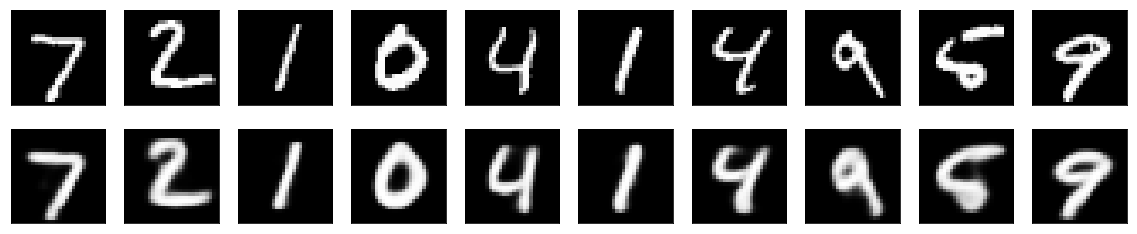

In [21]:
%matplotlib inline
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
#x = Flatten()(encoded)
x = Dense(128, activation='relu')(encoded) #(x)
x = Dense(num_classes, activation='softmax')(x)

classModel = Model(input_img, x)

for layer in classModel.layers[0:8]:
    layer.trainable = False
    print(layer)


classModel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#classModel.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

print(classModel.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
__________

In [26]:
print(classModel.get_weights()[0][0])
print(classModel.get_weights()[-1])

[[[-0.07623082 -0.12032484  0.3973239  -0.3366975   0.14241152
   -0.05673959  0.0844188   0.00570139 -0.14081125  0.15421757
   -0.1917015   0.24459676 -0.29250637  0.0634649  -0.15459545
   -0.08232243 -0.3602249  -0.17957644 -0.3409233  -0.39043853
   -0.43835434  0.18992577  0.02360842  0.20545992 -0.2596323
   -0.208677    0.00589803 -0.00967088 -0.15173426 -0.02905618
   -0.21358559  0.01682538]]

 [[-0.17867354 -0.07504158  0.05513505  0.04943751  0.01186244
   -0.06974396 -0.10617781 -0.03703439 -0.01056977  0.27876037
   -0.01569174  0.17649482 -0.00075268  0.12637718  0.01334574
   -0.12163792 -0.17849211 -0.06328982  0.24032484 -0.09484605
   -0.1033796  -0.01214933  0.08414569 -0.02863465 -0.10580882
    0.00571417  0.1344088   0.14858988 -0.1556052  -0.00534379
   -0.22810127  0.02708792]]

 [[-0.20064028 -0.13947819 -0.0716333   0.133561   -0.1296077
   -0.29020837 -0.21206509 -0.29857078 -0.09959412  0.18735065
   -0.18726988  0.04675273 -0.10878522 -0.00844475  0.221572

In [29]:
x_train_tmp = x_train[0:1000]
y_train_tmp = y_train[0:1000]

classModel.fit(x_train_tmp, y_train_tmp,
              batch_size=batch_size,
              epochs=100,
              verbose=1,
              validation_data=(x_test, y_test))   
    
score = classModel.evaluate(x_test, y_test, verbose=0)
print('Epochs:', epochs)
print('Samples to train:', x_train_tmp.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 271us/step - loss: 0.4228 - acc: 0.8750 - val_loss: 0.2907 - val_acc: 0.9105
Epoch 2/100
1000/1000 [==============================] - 0s 262us/step - loss: 0.4185 - acc: 0.8700 - val_loss: 0.2895 - val_acc: 0.9113
Epoch 3/100
1000/1000 [==============================] - 0s 258us/step - loss: 0.3969 - acc: 0.8720 - val_loss: 0.2858 - val_acc: 0.9118
Epoch 4/100
1000/1000 [==============================] - 0s 262us/step - loss: 0.3964 - acc: 0.8870 - val_loss: 0.2815 - val_acc: 0.9158
Epoch 5/100
1000/1000 [==============================] - 0s 266us/step - loss: 0.4095 - acc: 0.8640 - val_loss: 0.2866 - val_acc: 0.9113
Epoch 6/100
1000/1000 [==============================] - 0s 261us/step - loss: 0.3823 - acc: 0.8790 - val_loss: 0.2759 - val_acc: 0.9144
Epoch 7/100
1000/1000 [==============================] - 0s 257us/step - loss: 0.3953 - acc: 0.8810 - val_loss: 0.2742 - val_acc:

1000/1000 [==============================] - 0s 266us/step - loss: 0.2824 - acc: 0.9070 - val_loss: 0.2335 - val_acc: 0.9276
Epoch 61/100
1000/1000 [==============================] - 0s 276us/step - loss: 0.3002 - acc: 0.9150 - val_loss: 0.2347 - val_acc: 0.9281
Epoch 62/100
1000/1000 [==============================] - 0s 263us/step - loss: 0.3196 - acc: 0.8950 - val_loss: 0.2393 - val_acc: 0.9248
Epoch 63/100
1000/1000 [==============================] - 0s 274us/step - loss: 0.2881 - acc: 0.9120 - val_loss: 0.2353 - val_acc: 0.9263
Epoch 64/100
1000/1000 [==============================] - 0s 270us/step - loss: 0.3025 - acc: 0.9170 - val_loss: 0.2360 - val_acc: 0.9287
Epoch 65/100
1000/1000 [==============================] - 0s 272us/step - loss: 0.2957 - acc: 0.9070 - val_loss: 0.2346 - val_acc: 0.9257
Epoch 66/100
1000/1000 [==============================] - 0s 274us/step - loss: 0.3133 - acc: 0.8960 - val_loss: 0.2301 - val_acc: 0.9288
Epoch 67/100
1000/1000 [=======================

In [17]:
print(classModel.get_weights()[0][0])
print(classModel.get_weights()[-1])

[[[ 0.29919255  0.01709349  0.3053112   0.00155063  0.08828022
    0.18722624 -0.17406873 -0.0623871   0.00153094  0.02996115
   -0.11959304 -0.02224343 -0.24095383  0.18268563 -0.02146808
   -0.08516683 -0.001798   -0.6378872  -0.14818974 -0.46854314
   -0.66712457 -0.16254285 -0.17881007  0.12634867 -0.05036632
   -0.08821664  0.00725421 -0.778612    0.33235785 -0.01625446
    0.16069423 -0.12577629]]

 [[-0.21167481 -0.41408643 -0.32262242  0.14294715  0.16305844
    0.33179703 -0.3587876  -0.12397511 -0.38373846 -0.80936277
   -0.02454054  0.17845833  0.0645322   0.21386188  0.0056273
   -0.00977601 -0.25480133 -0.6131768  -0.2643894  -0.4865285
    0.69117105 -0.16891165 -0.28950822 -0.2052995  -0.35832945
   -0.5820058   0.08143426 -0.34401196 -0.07202615 -0.085149
    0.0438566  -0.6265777 ]]

 [[-0.00137072 -0.17525797  0.01615386  0.24336788  0.20005539
    0.00609318 -0.13770357 -0.10311387 -0.21559714 -0.05773453
   -0.02362541 -0.11833433 -0.18994513 -0.17465658  0.02132894